# Assignment No.2
## Supervised Learning
| Bernardo Gil Alves Salgado (up202004493) | Michal Sztepiuk (up202302748) | Michal Dawid Kowalski (up202401554) |

AI's Introduction’s second practical assignment consists of the application of machine learning models and algorithms related to supervised learning.

**Supervised learning** involves analyzing and preparing the dataset, identifying the target variable, splitting the data into training and test sets, selecting and tuning a learning algorithm, and evaluating the model's performance on the test set.

## 1. EDA

**Dataset:** SDSS Galaxy Classification DR18 (https://www.kaggle.com/datasets/bryancimo/sdss-galaxy-classification-dr18)

**Brief:** 100,000 rows of photometric image data from the Sloan Digital Sky Survey.

**Description:** The Sloan Digital Sky Survey (SDSS) has searched about one-third of the sky and found around 1 billion objects and almost 3 million of those are galaxies. It contains 100,000 rows of photometric image data and the galaxy subclass is limited to two types, 'STARFORMING' or 'STARBURST'

### 1.1 Basic Analyse

In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Reading the Galaxy Dataset
df = pd.read_csv('sdss_100k_galaxy_form_burst.csv')

In [88]:
# Statistical Characteristics
print('\033[1mStatistical Characteristics:\033[0m\n')
df.describe()

Statistical Characteristics:



,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


In [89]:
# Values counts
df.subclass.value_counts()

subclass
STARFORMING    74993
STARBURST      25007
Name: count, dtype: int64

In [76]:
# Dataset duplicates
print('Dataset duplicates:',df.duplicated().any())

Dataset duplicates: False


In [77]:
# Class distribution
print(df['class'].value_counts())
print()
print(df['subclass'].value_counts())

class
GALAXY    100000
Name: count, dtype: int64

subclass
STARFORMING    74993
STARBURST      25007
Name: count, dtype: int64


- We have to consider feature **subclass** which defines STARFORMING (75%) or STARBURST (25%)
- Dataset is imbalanced

In [78]:
# Calculate percentages for each subclass
subclass_counts = df['subclass'].value_counts()
subclass_percentage = (subclass_counts / len(df)) * 100
print(subclass_percentage)

subclass
STARFORMING    74.993
STARBURST      25.007
Name: count, dtype: float64


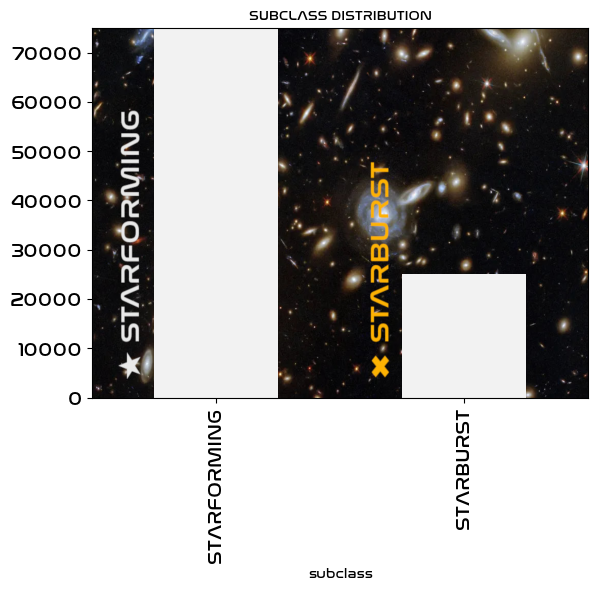

In [79]:
import matplotlib.font_manager as fm
import matplotlib.image as mpimg

# Setting up the font
font_path = 'media/nasalisation.otf' #Path to the font
fm.fontManager.addfont(font_path)  # Add the font to the font manager
font_prop = fm.FontProperties(fname=font_path) #FontProperties object
plt.rcParams['font.family'] = font_prop.get_name()  # Setting the font globally

# Setting up the default bars
default_bar_color = (0.95, 0.95, 0.95)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[default_bar_color])

# Set the default background and axes color
plt.rcParams['axes.facecolor'] = (0.1, 0.1, 0.25)

# Creating the plot
fig, ax = plt.subplots()

# Load and display background image
background = mpimg.imread('media/background1.jpg')
shift_amount = -0.5
ax.imshow(background, aspect='auto', extent=[shift_amount, len(df['subclass'].value_counts()) + shift_amount, 0, df['subclass'].value_counts().max()], zorder=0)


# Creating the bar plot
df['subclass'].value_counts().plot(kind='bar', ax=ax, title='Subclass Distribution', fontsize=14, zorder=1)
plt.title('SUBCLASS DISTRIBUTION', fontsize=16, fontproperties=font_prop, zorder=2)
plt.show()

In [80]:
# Check for placeholder invalid values
print('\033[1mInvalid values:\033[0m\n')
print((df == -9999).sum())
# Replace placeholder invalid values
df.replace(-9999.0, np.nan, inplace=True)

Invalid values:

objid              0
specobjid          0
ra                 0
dec                0
u                 11
g                 11
r                  9
i                 10
z                 13
modelFlux_u        0
modelFlux_g        0
modelFlux_r        0
modelFlux_i        0
modelFlux_z        0
petroRad_u         0
petroRad_g         0
petroRad_i         0
petroRad_r         0
petroRad_z         0
petroFlux_u        0
petroFlux_g        0
petroFlux_i        0
petroFlux_r        0
petroFlux_z        0
petroR50_u      1570
petroR50_g       154
petroR50_i       131
petroR50_r        68
petroR50_z       923
psfMag_u          11
psfMag_r           9
psfMag_g          11
psfMag_i          10
psfMag_z          13
expAB_u           11
expAB_g           11
expAB_r            9
expAB_i           10
expAB_z           13
class              0
subclass           0
redshift           0
redshift_err       0
dtype: int64


In [81]:
# Check for missing values
print('\033[1mMissing values:\033[0m\n')
null_columns = df.isnull().sum()[df.isnull().sum() > 0]
print(null_columns)

Missing values:

u               11
g               11
r                9
i               10
z               13
petroR50_u    1570
petroR50_g     154
petroR50_i     131
petroR50_r      68
petroR50_z     923
psfMag_u        11
psfMag_r         9
psfMag_g        11
psfMag_i        10
psfMag_z        13
expAB_u         11
expAB_g         11
expAB_r          9
expAB_i         10
expAB_z         13
dtype: int64


- There are some missing values in the dataset.

In [82]:
# Unique values per column
print('\033[1mNumber of unique values:\033[0m\n')
print(df.nunique())

Number of unique values:

objid            99998
specobjid       100000
ra               99998
dec              99998
u                88194
g                87211
r                86340
i                86605
z                87316
modelFlux_u      99311
modelFlux_g      99523
modelFlux_r      99232
modelFlux_i      98970
modelFlux_z      99250
petroRad_u       93340
petroRad_g       98537
petroRad_i       99351
petroRad_r       99205
petroRad_z       99062
petroFlux_u      99347
petroFlux_g      99550
petroFlux_i      98911
petroFlux_r      99243
petroFlux_z      99115
petroR50_u       97415
petroR50_g       98684
petroR50_i       98663
petroR50_r       98770
petroR50_z       97701
psfMag_u         86414
psfMag_r         86266
psfMag_g         86109
psfMag_i         86803
psfMag_z         86518
expAB_u          92591
expAB_g          97954
expAB_r          98489
expAB_i          98471
expAB_z          96523
class                1
subclass             2
redshift         99260
redshift

### 1.2 Data Visualization

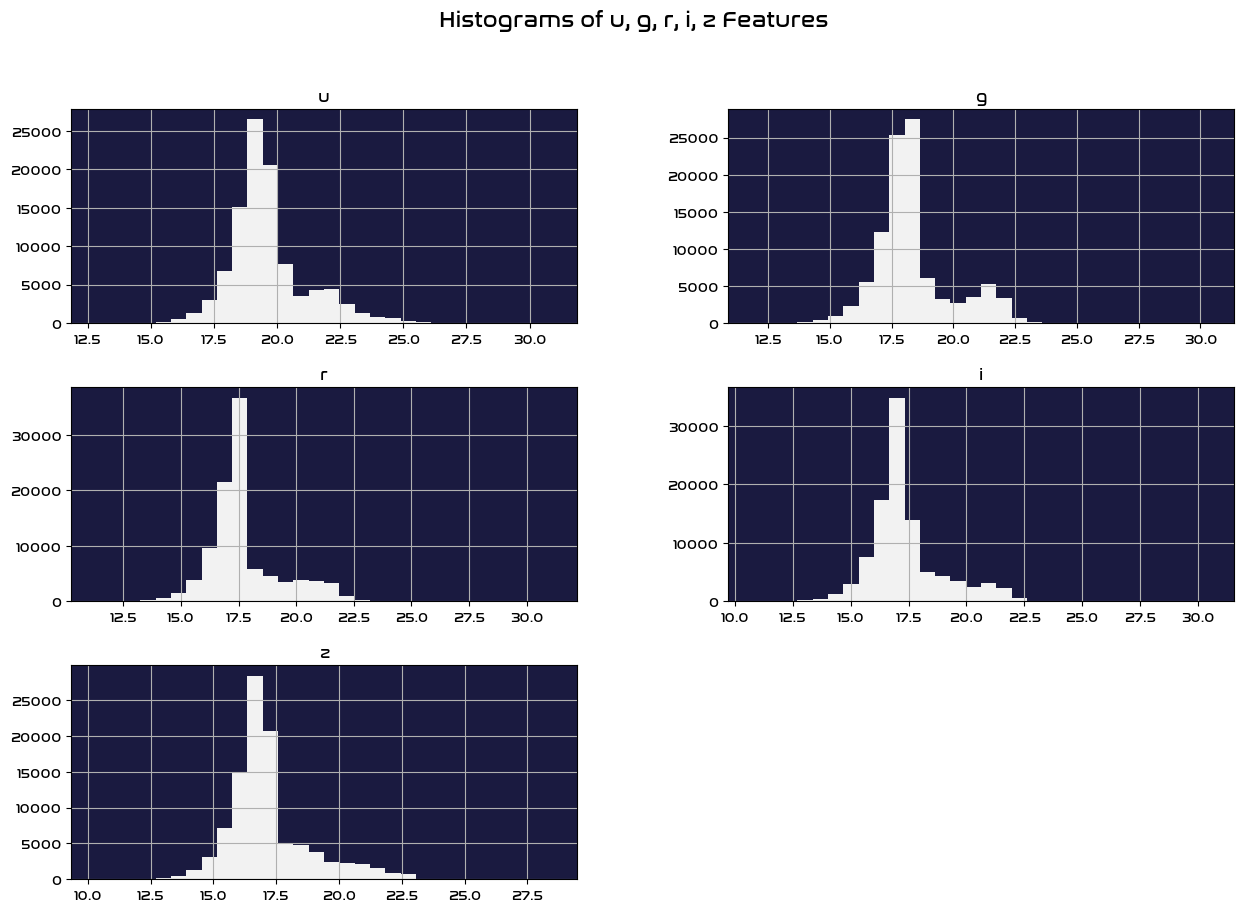

In [83]:
# Shorthand alias for modelMag Distribution
df[['u', 'g', 'r', 'i', 'z']].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of u, g, r, i, z Features", fontsize=16)
plt.show()

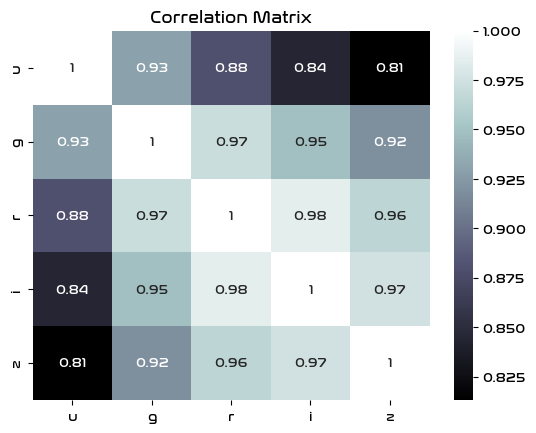

In [84]:
# Correlation matrix
correlation = df[['u', 'g', 'r', 'i', 'z']].corr()
# Visualize
sns.heatmap(correlation, annot=True, cmap='bone')
plt.title("Correlation Matrix")
plt.show()

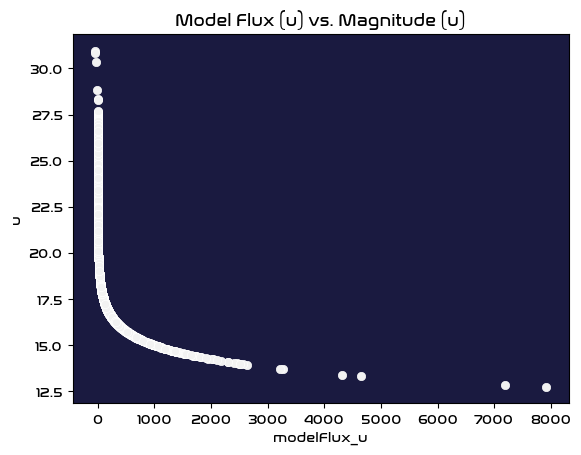

In [85]:
sns.scatterplot(x='modelFlux_u', y='u', data=df)
plt.title("Model Flux (u) vs. Magnitude (u)")
plt.show()

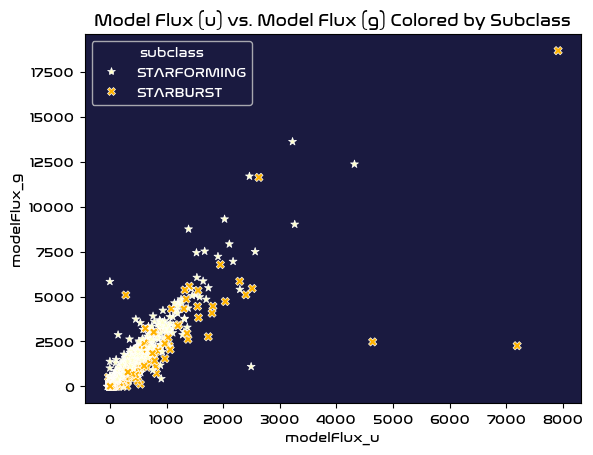

In [92]:
def galaxy_scatterplot(x, y, title, **kwargs):

    # Create the markers
    galaxy_markers = {
    'STARFORMING': '*',
    'STARBURST': 'X',
    }

    # Set the palette
    galaxy_palette = ["#FFFFCC", "#FFB300"]
    sns.set_palette(galaxy_palette)
    
    # Create the scatter plot
    sns.scatterplot(x=x, y=y, hue='subclass', style='subclass', data=df, markers=galaxy_markers, **kwargs)

    # Set the title
    plt.title(title)

    # Legend text colored white
    for item in plt.gca().get_legend().get_texts() + [plt.gca().get_legend().get_title()]:
        item.set_color('white')
    
    # Show the plot
    plt.show()


galaxy_scatterplot('modelFlux_u', 'modelFlux_g', "Model Flux (u) vs. Model Flux (g) Colored by Subclass")

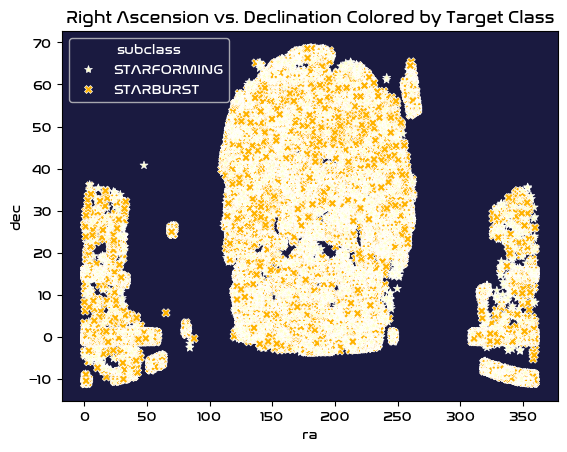

In [93]:
galaxy_scatterplot('ra', 'dec', "Right Ascension vs. Declination Colored by Target Class")

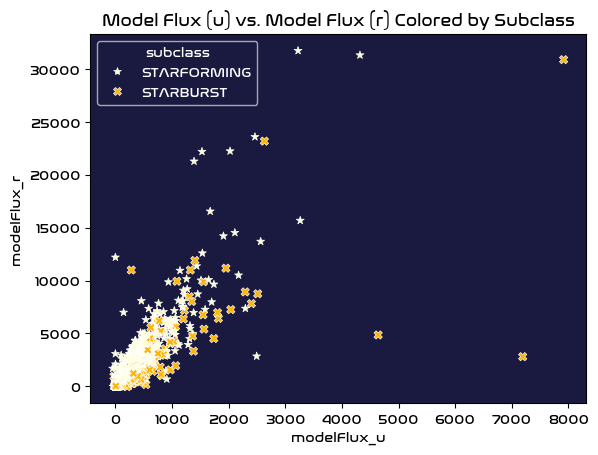

In [94]:
galaxy_scatterplot('modelFlux_u', 'modelFlux_r', "Model Flux (u) vs. Model Flux (r) Colored by Subclass")

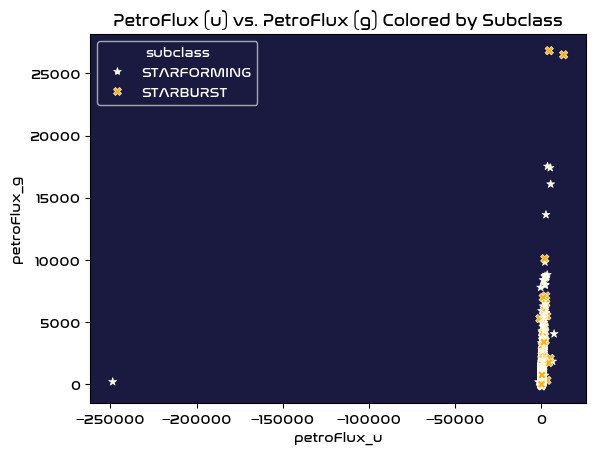

In [23]:
galaxy_scatterplot('petroFlux_u', 'petroFlux_g', "PetroFlux (u) vs. PetroFlux (g) Colored by Subclass")

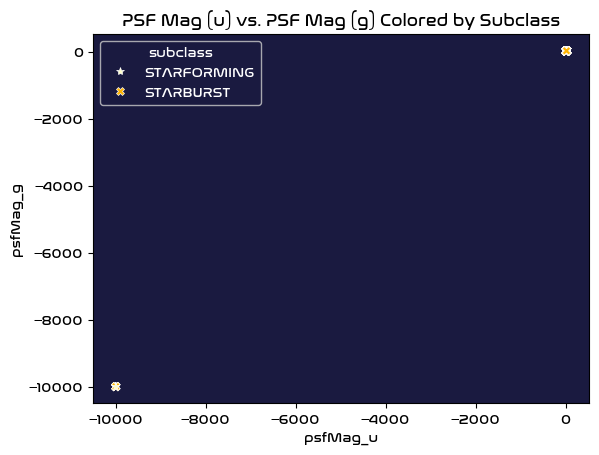

In [96]:
galaxy_scatterplot('psfMag_u', 'psfMag_g', "PSF Mag (u) vs. PSF Mag (g) Colored by Subclass")

## 2. Data preprocessing

Data preprocessing gets the dataset ready for analysis. It involves fixing outliers, handling missing values, choosing important features, scaling the data for consistency, and balancing classes to avoid biased results. These steps make the data clean and usable for modeling (improves dataset quality).

In [97]:
# Dropping irrelevant features
df.drop(['class','objid','specobjid'], axis=1, inplace=True) 

# Changing 'subclass' to binary values (mapping)
# STARFORMING - 0, STARBURST - 1
df['subclass'] = df['subclass'].map({'STARFORMING': 0, 'STARBURST': 1})

# Handling placeholders
df.replace(-9999.00000, np.nan, inplace=True) # Map to nan
df.dropna(inplace=True) # Drop placeholders

In [98]:
# # Choosing best 10 Features from 40 to avoid overfitting and high complexity of the problem using RandomForestClassifier
# X = df.drop(['subclass'], axis=1)
# y = df['subclass']

# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X, y)
# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# df.shape

# plt.figure(figsize=(8, 5))
# feature_importances.plot(kind='barh')
# plt.title('Feature Importances from Random Forest', fontsize=16)
# plt.xlabel('Importance Score', fontsize=12)
# plt.ylabel('Features', fontsize=12)
# plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
# plt.tight_layout()
# plt.show()

In [99]:
# # Selecting best 15 features
# #X = df.drop(['subclass','class'], axis=1)
# top_15_features = feature_importances.nlargest(15)
# X = X[top_15_features.index]

# # Dataframe with reduced number of features
# df_red = pd.concat([X, y], axis=1)
# len(df.drop(['subclass'], axis=1).columns)

In [100]:
# Function to identify outliers using IQR method
def find_outliers(df, columns):
    outlier_rows = set()
    
    for column in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier condition
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers in the column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Add the indices of the rows with outliers to the set
        outlier_rows.update(outliers.index)
    
    return outlier_rows

# Columns to check for outliers
columns_to_check = df.drop(['subclass'], axis=1).columns.to_list()

# Find rows with outliers
outlier_rows = find_outliers(df, columns_to_check)

# Output the number of rows with outliers
print(f"Number of rows with outliers: {len(outlier_rows)}")

Number of rows with outliers: 41684


In [101]:
# Updated function to count rows with more than 3 outliers (4 or more)
def find_rows_with_many_outliers(df, columns, min_outliers=0):
    row_outlier_count = {}

    for column in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier condition
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers in the column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Increment outlier count for each row
        for index in outliers.index:
            row_outlier_count[index] = row_outlier_count.get(index, 0) + 1

    # Count rows with outlier count exceeding the threshold
    rows_with_many_outliers = [row for row, count in row_outlier_count.items() if count > min_outliers]

    return len(rows_with_many_outliers)

# Find rows with more than 3 outliers (4 or more)
rows_with_many_outliers = find_rows_with_many_outliers(df, columns_to_check, min_outliers=3)

# Output the number of rows with more than 3 outliers
print(f"Number of rows with more than 3 outliers – to be cleaned: {rows_with_many_outliers}")

Number of rows with more than 3 outliers – to be cleaned: 24123


In [102]:
def drop_rows_with_many_outliers(df, columns, max_outliers=3):
    # Create a DataFrame to store whether each value is an outlier (True/False)
    outliers_df = pd.DataFrame(False, index=df.index, columns=df.columns)

    # Iterate over each column to detect outliers
    for column in columns:
        # Calculate Q1, Q3, and IQR for the current column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mark the outliers in the current column
        outliers_df[column] = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Count the number of outliers in each row (sum across columns)
    row_outlier_count = outliers_df.sum(axis=1)

    # Keep only the rows with 3 or fewer outliers
    df_cleaned = df[row_outlier_count <= max_outliers]
    
    return df_cleaned

# Reduced dataset without rows with more than 3 outliers
df_r = drop_rows_with_many_outliers(df, columns_to_check, 3)
print("The cleaned DataFrame has " + str(df_r.shape[0]) + " rows and " + str(df_r.shape[1]) + " columns.")

The cleaned DataFrame has 73355 rows and 40 columns.


In [103]:
# Spliting entire DataFrame on X, y
X = df.drop('subclass',axis=1)
y = df.subclass

# Splitting reduced DataFrame on X, y
X_r = df_r.drop('subclass',axis=1)
y_r = df_r.subclass

In [104]:
# Scaling values using StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scal = scaler.fit_transform(X)
X = pd.DataFrame(X_scal, columns=X.columns) # Scaled X

X_scal_r = scaler.fit_transform(X_r)
X_r = pd.DataFrame(X_scal_r, columns=X_r.columns) # Scaled reduced X

In [105]:
# Splitting data into training and test set (80/20) + shuffling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # Entire set

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42, shuffle=True) # Reduced set

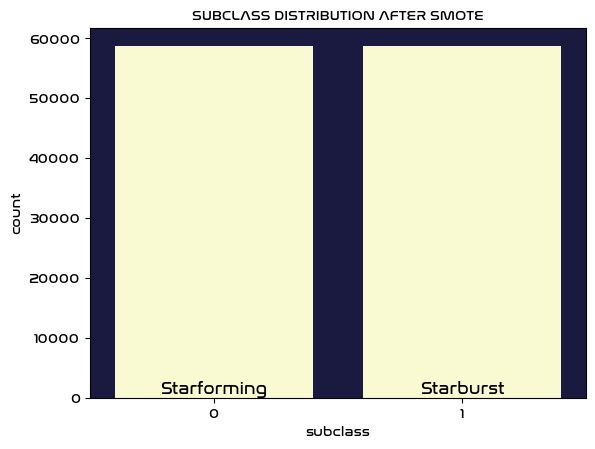

In [106]:
# Synthetic Minority Over-sampling Technique (SMOTE) - Handling classes imbalance in the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)

# From entire set
X_sm, y_sm = smote.fit_resample(X_train, y_train)

df_bal = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm, columns=['subclass'])], axis=1)
sns.countplot(data=df_bal, x='subclass')
plt.title('SUBCLASS DISTRIBUTION AFTER SMOTE', fontsize=16, fontproperties=font_prop, zorder=2)

# Names of subclasses under columns
plt.text(0, 0, 'Starforming', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(1, 0, 'Starburst', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

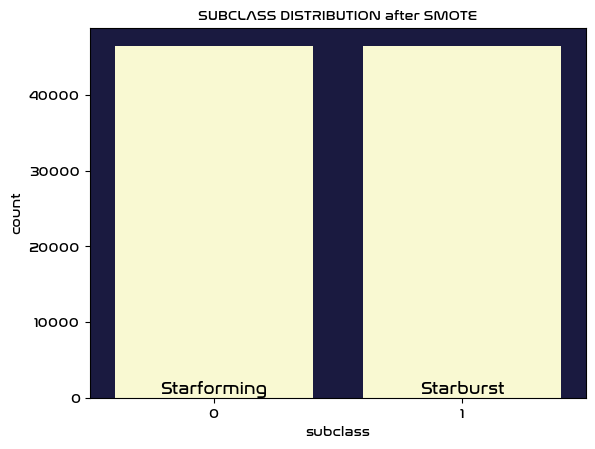

In [107]:
# From reduced set
X_sm_r, y_sm_r = smote.fit_resample(X_train_r, y_train_r)

df_bal_r = pd.concat([pd.DataFrame(X_sm_r), pd.DataFrame(y_sm_r, columns=['subclass'])], axis=1)
sns.countplot(data=df_bal_r, x='subclass')
plt.title('SUBCLASS DISTRIBUTION after SMOTE', fontsize=16, fontproperties=font_prop, zorder=2)

# Names of subclasses under columns
plt.text(0, 0, 'Starforming', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(1, 0, 'Starburst', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

## 3. Models Building

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, confusion_matrix, classification_report
# Evaluation Functions
# ROC-AUC Function
def plot_roc_auc(y_test, y_pred, title):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.xlabel('FP Rate', fontsize=12)
    plt.ylabel('TP Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Confusion Matrix Function
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

### 3.1 Random Forest

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [63]:
# RandomForest Model: CHEKING BEST PARAMETERS

# Parameters dor Randomizer CV
rf_params = {
    'n_estimators': randint(100, 300),  # Randomly sample between 100 and 300
    'max_depth': [None] + list(range(10, 110, 10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],   
}

# Function to find best parameters basing on F1-Score
def make_random_search(model, param_distributions):
    return RandomizedSearchCV(
        model,
        param_distributions,
        n_iter=20,
        cv=3,
        scoring='f1',
        random_state=42
    )

- **Entire Dataset** (keeping all outliers)

In [326]:
# ENTIRE DATASET
# Taking 10% of the train dataset just to find best parameters
X_param, _, y_param, _ = train_test_split(X_sm, y_sm, train_size=0.1, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

random_search = make_random_search(rf_model, rf_params)

random_search.fit(X_param, y_param)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}


In [358]:
# Print best score
print(f"Best f1-score: {random_search.best_score_:.2f}")

Best f1-score: 0.87


In [334]:
# ENTIRE DATASET (10% of the train set)
# Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}
# Get the best model from the search
best_rf_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_rf_model.predict(X_test)

# Classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     14750
           1       0.65      0.85      0.74      4746

    accuracy                           0.85     19496
   macro avg       0.80      0.85      0.82     19496
weighted avg       0.87      0.85      0.86     19496



- **Entire Dataset - RF Performance**

In [350]:
# ENTIRE DATASET (100% of the train set)
# Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}
# Get the best model from the search
best_rf_model = random_search.best_estimator_

# Fit the model with all dataset
best_rf_model.fit(X_sm, y_sm)

# Make predictions on the validation set
y_pred = best_rf_model.predict(X_test)

# Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.91     14750
           1       0.70      0.84      0.76      4746

    accuracy                           0.87     19496
   macro avg       0.82      0.86      0.84     19496
weighted avg       0.89      0.87      0.88     19496



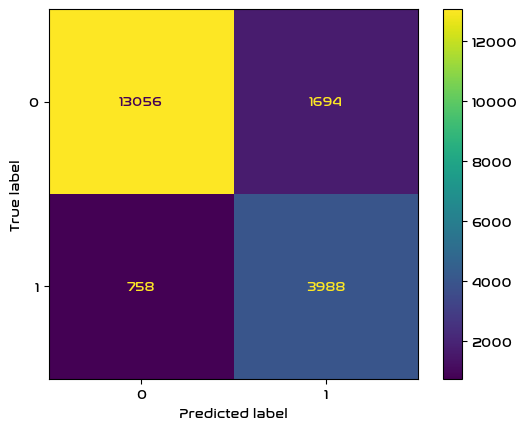

In [380]:
# Evaluation ENTIRE DATA(100%)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

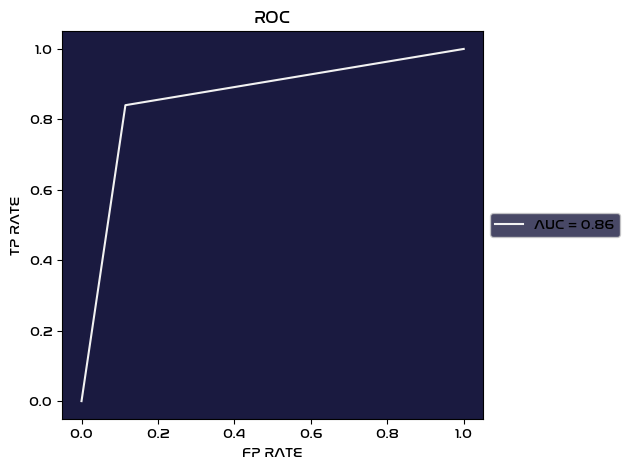

In [382]:
# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('FP RATE')
plt.ylabel('TP RATE')
plt.title('ROC')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.show()

- **Reduced Dataset** (dropped rows with more than 3 outliers)

In [340]:
# REDUCED DATASET
# Taking 10% of the dataset for parameter tuning (reduced dataset)
X_param_r, _, y_param_r, _ = train_test_split(X_sm_r, y_sm_r, train_size=0.1, random_state=42)

rf_model_r = RandomForestClassifier(random_state=42)

random_search_r = make_random_search(rf_model_r, rf_params)

random_search_r.fit(X_param_r, y_param_r)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search_r.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}


In [360]:
# Print best score
print(f"Best f1-score: {random_search_r.best_score_:.2f}")

Best f1-score: 0.86


In [342]:
# REDUCED DATASET (10% of the train set)
# Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}
# Get the best model from the search
best_rf_model_r = random_search_r.best_estimator_

# Make predictions on the validation set
y_pred_r = best_rf_model_r.predict(X_test_r)

# Classification report 
print(classification_report(y_test_r,y_pred_r))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     11748
           1       0.58      0.85      0.69      2923

    accuracy                           0.85     14671
   macro avg       0.77      0.85      0.79     14671
weighted avg       0.88      0.85      0.86     14671



- **Reduced Dataset - RF Performance**

In [352]:
# REDUCED DATASET (100% of the train set)
# Best Hyperparameters: {'bootstrap': True, 'max_depth': 60, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}
# Get the best model from the search
best_rf_model_r = random_search_r.best_estimator_

# Fit the model with all dataset
best_rf_model_r.fit(X_sm_r, y_sm_r)

# Make predictions on the validation set
y_pred_r = best_rf_model_r.predict(X_test)

# Classification report 
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     14750
           1       0.58      0.14      0.22      4746

    accuracy                           0.77     19496
   macro avg       0.68      0.55      0.54     19496
weighted avg       0.73      0.77      0.71     19496



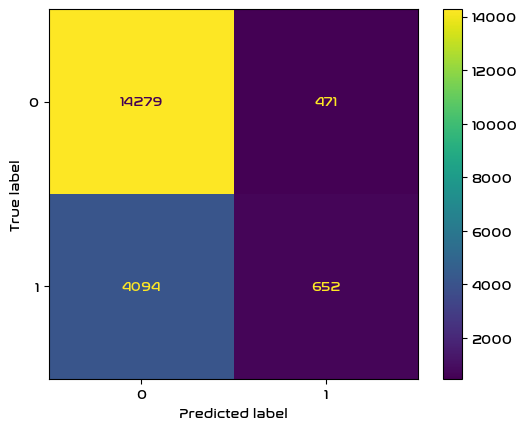

In [368]:
# Evaluation REDUCED DATA(100%)
# Confusion matrix
cm_r = confusion_matrix(y_test, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_r)
disp.plot()

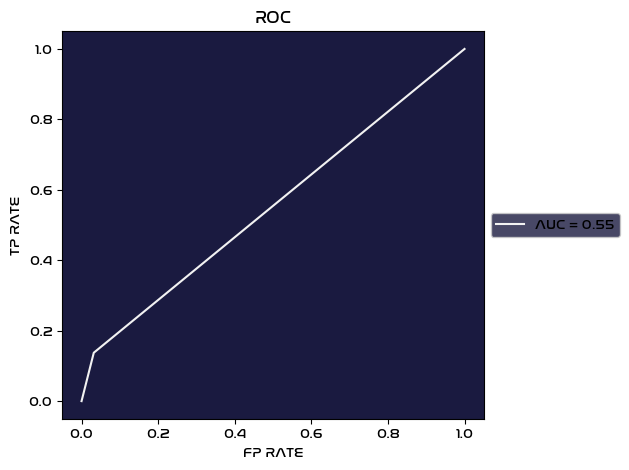

In [386]:
# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_r)
auc = roc_auc_score(y_test, y_pred_r)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('FP RATE')
plt.ylabel('TP RATE')
plt.title('ROC')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.show()

### 3.2 Neural Networks

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall

2024-12-14 14:17:04.219162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
# Evaluation Function for NN Models
def evaluate_model_nn(y_test, y_pred, history):
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', [])
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    if val_loss:
        plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()   

- **Model 1**

In [54]:
# Build NN model (1st version)
model1 = Sequential()
# 1st hid. layer
model1.add(Input(shape=(X_train.shape[1],))) 
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
# 2nd hid. layer
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
# 3rd hid. layer
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))
# Output layer
model1.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) # Adam optimizer
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Model compliation

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # using EarlyStopping to accelerate train process

history1 = model1.fit(X_sm, y_sm, 
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7605 - loss: 0.5039 - val_accuracy: 0.7375 - val_loss: 0.5875
Epoch 2/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8441 - loss: 0.3687 - val_accuracy: 0.8954 - val_loss: 0.3076
Epoch 3/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8482 - loss: 0.3592 - val_accuracy: 0.8213 - val_loss: 0.4239
Epoch 4/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8527 - loss: 0.3544 - val_accuracy: 0.7858 - val_loss: 0.4716
Epoch 5/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8522 - loss: 0.3508 - val_accuracy: 0.8177 - val_loss: 0.4192
Epoch 6/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8532 - loss: 0.3498 - val_accuracy: 0.7292 - val_loss: 0.6031
Epoch 7/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8550 - loss: 0.3462 - val_accuracy: 0.8683 - val_loss: 0.3517
Epoch 8/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8553 - loss: 0.3435 - 

610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     14750
           1       0.63      0.86      0.73      4746

    accuracy                           0.84     19496
   macro avg       0.79      0.85      0.81     19496
weighted avg       0.87      0.84      0.85     19496



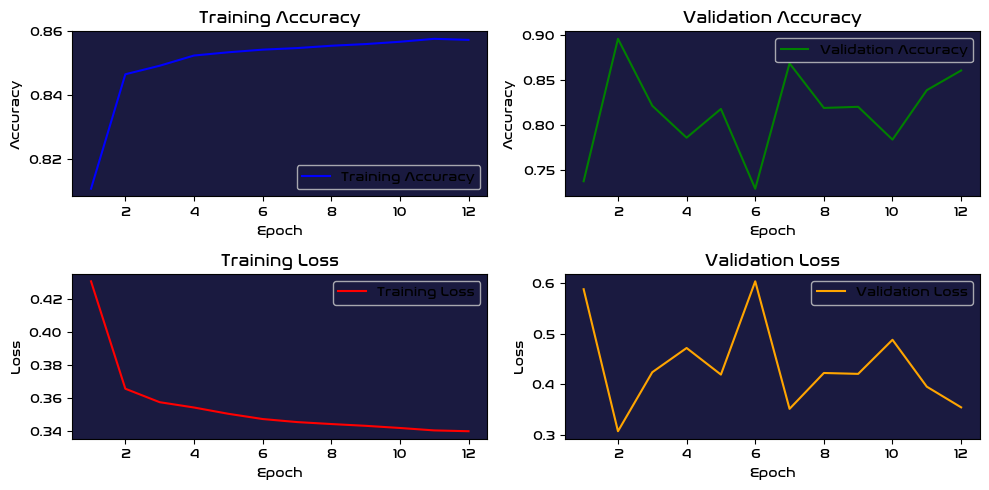

In [56]:
# Evaluation
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

evaluate_model_nn(y_test, y_pred, history1)

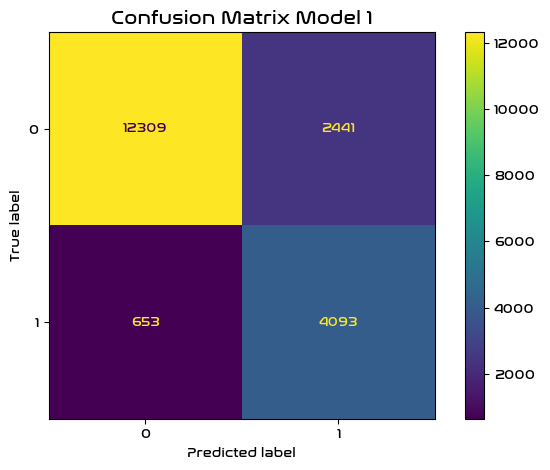

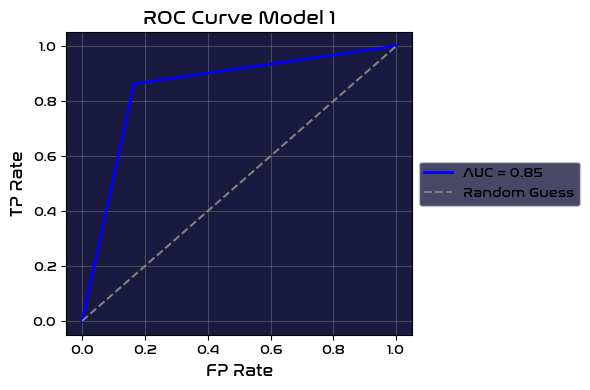

In [80]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix Model 1')
plot_roc_auc(y_test, y_pred, title='ROC Curve Model 1')

- **Model 2**

Epoch 1/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7684 - loss: 0.5647 - val_accuracy: 0.7770 - val_loss: 0.5447
Epoch 2/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8479 - loss: 0.4032 - val_accuracy: 0.8436 - val_loss: 0.4154
Epoch 3/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8483 - loss: 0.3914 - val_accuracy: 0.8894 - val_loss: 0.3484
Epoch 4/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.3852 - val_accuracy: 0.7979 - val_loss: 0.4922
Epoch 5/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8548 - loss: 0.3757 - val_accuracy: 0.8099 - val_loss: 0.4668
Epoch 6/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8531 - loss: 0.3759 - val_accuracy: 0.7691 - val_loss: 0.5346
Epoch 7/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8506 - loss: 0.3794 - val_accuracy: 0.7828 - val_loss: 0.5105
Epoch 8/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8560 - loss: 0.3701 - 

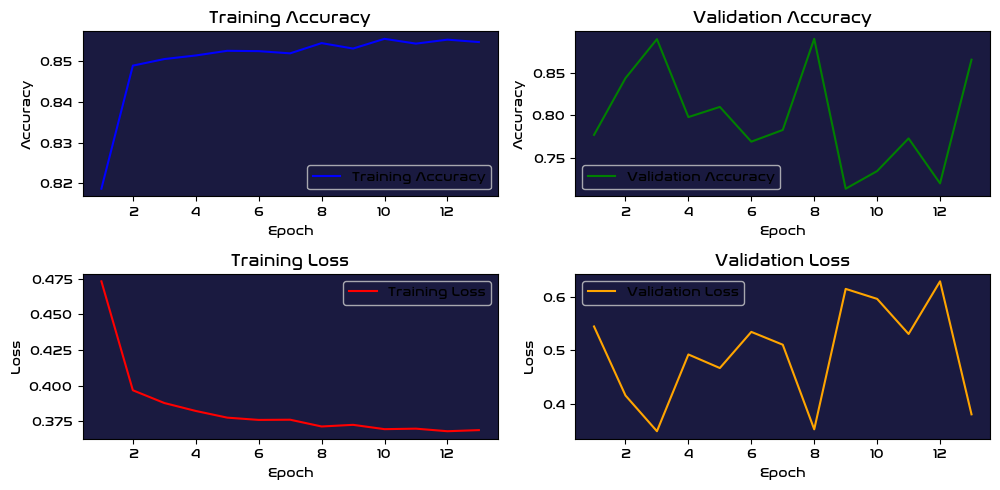

In [82]:
# Build NN model (2nd version) with kernel regularizer
model2 = Sequential()
# 1st hid. layer
model2.add(Input(shape=(X_train.shape[1],))) 
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(Dropout(0.1))
# 2nd hid. layer
model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(Dropout(0.2))
# 3rd hid. layer
model2.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(Dropout(0.3))
# Output layer
model2.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) # Adam optimizer
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Model compliation

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # using EarlyStopping to accelerate train process

history2 = model2.fit(X_sm, y_sm, 
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# Evaluation
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

evaluate_model_nn(y_test, y_pred, history2)

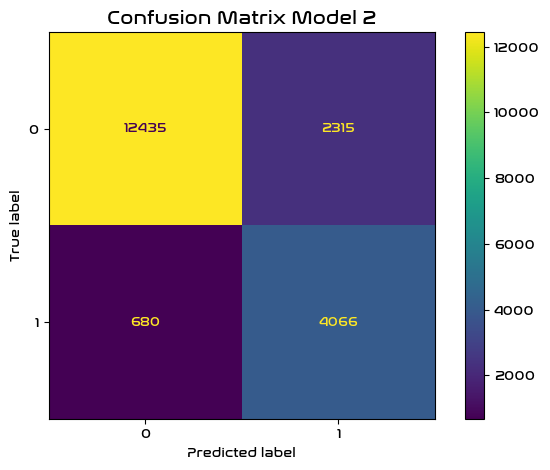

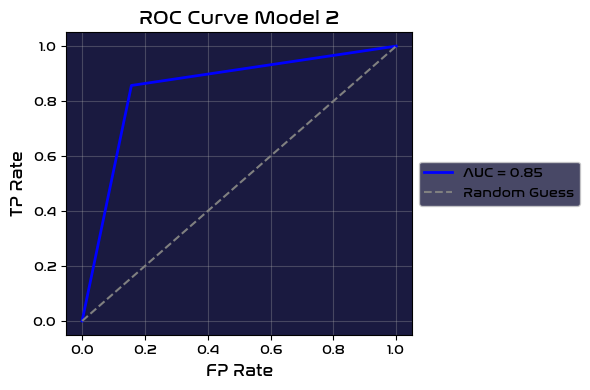

In [84]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix Model 2')
plot_roc_auc(y_test, y_pred, title='ROC Curve Model 2')

- **Model 3**

Epoch 1/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7903 - loss: 0.6022 - val_accuracy: 0.8431 - val_loss: 0.4588
Epoch 2/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8547 - loss: 0.4006 - val_accuracy: 0.9327 - val_loss: 0.2710
Epoch 3/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8554 - loss: 0.3675 - val_accuracy: 0.7696 - val_loss: 0.5863
Epoch 4/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8574 - loss: 0.3585 - val_accuracy: 0.9086 - val_loss: 0.3034
Epoch 5/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8572 - loss: 0.3552 - val_accuracy: 0.7069 - val_loss: 0.6141
Epoch 6/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8593 - loss: 0.3500 - val_accuracy: 0.9168 - val_loss: 0.2722
Epoch 7/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8578 - loss: 0.3481 - val_accuracy: 0.9368 - val_loss: 0.2123
Epoch 8/50
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8581 - loss: 0.3486 -

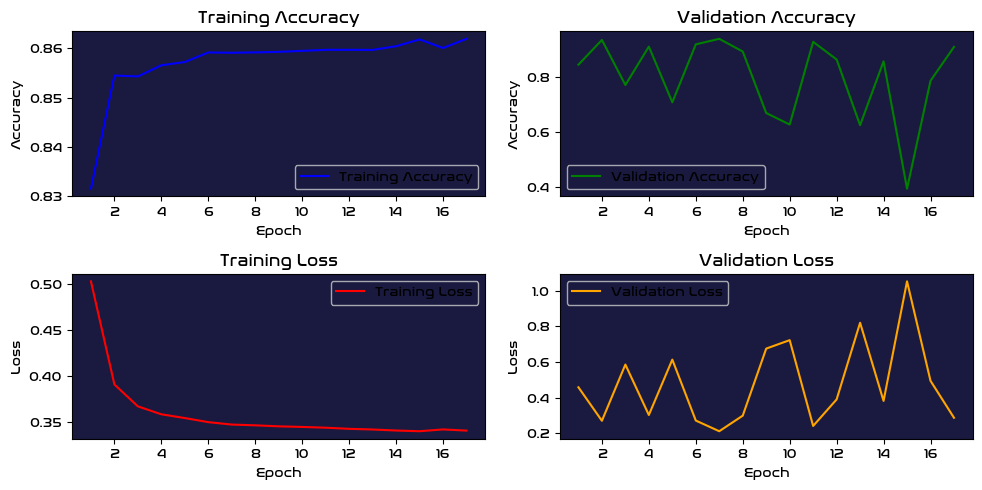

In [86]:
# Build NN model (3rd version) with BatchNormalization
model3 = Sequential()
# 1st hid. layer
model3.add(Input(shape=(X_train.shape[1],))) 
model3.add(Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.1))
# 2nd hid. layer
model3.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
# 3rd hid. layer
model3.add(Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
# Output layer
model3.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) # Adam optimizer
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Model compliation

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # using EarlyStopping to accelerate train process

history3 = model3.fit(X_sm, y_sm, 
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# Evaluation
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5).astype(int)

evaluate_model_nn(y_test, y_pred3, history3)

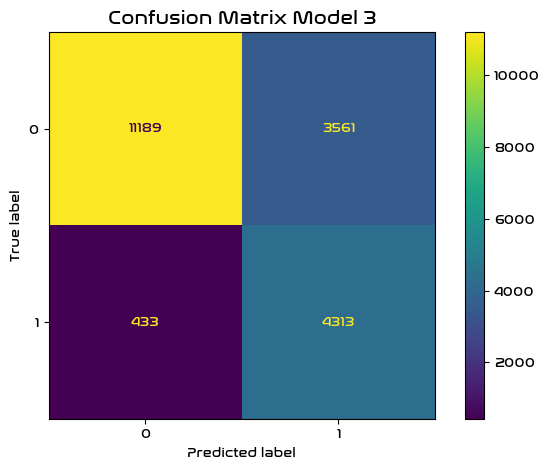

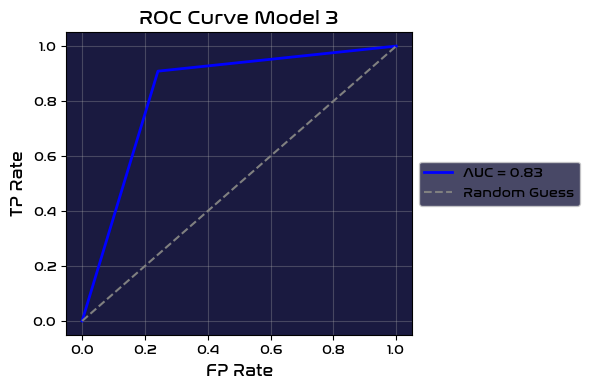

In [87]:
plot_confusion_matrix(y_test, y_pred3, title='Confusion Matrix Model 3')
plot_roc_auc(y_test, y_pred3, title='ROC Curve Model 3')

### 3.3 SVM Model

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import classification_report

In [40]:
# SVM Model: FINDING BEST PARAMETERS
# Parameters for GridSearchCV

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Only relevant for polynomial kernel
}

# Function to find best parameters based on F1-Score
def make_grid_search(model, param_grid):
    return GridSearchCV(
        model,
        param_grid,
        cv=3,
        scoring='f1',
        verbose=1
    )

- **Entire Dataset**

In [ ]:
# ENTIRE DATASET
# Taking 10% of the train dataset just to find best parameters
X_param, _, y_param, _ = train_test_split(X_sm, y_sm, train_size=0.1, random_state=42)

svm_model = SVC(random_state=42)

# Perform GridSearchCV
grid_search = make_grid_search(svm_model, svm_params)
grid_search.fit(X_param, y_param)

grid_search.best_params_ = {'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [95]:
# ^^ RESULT OF THIS CODE ABOVE: 
# Fitting 3 folds for each of 72 candidates, totalling 216 fits
# Best Hyperparameters: {'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [106]:
# ENTIRE DATASET (100% of the train set)

# Define the best SVM model
best_svm_model = SVC(C=100, degree=4, gamma='scale', kernel='poly', random_state=42)

# Fit the model with the entire dataset
best_svm_model.fit(X_sm, y_sm)

# Make predictions on the validation set
y_pred = best_svm_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     14750
           1       0.69      0.86      0.76      4746

    accuracy                           0.87     19496
   macro avg       0.82      0.87      0.84     19496
weighted avg       0.89      0.87      0.87     19496



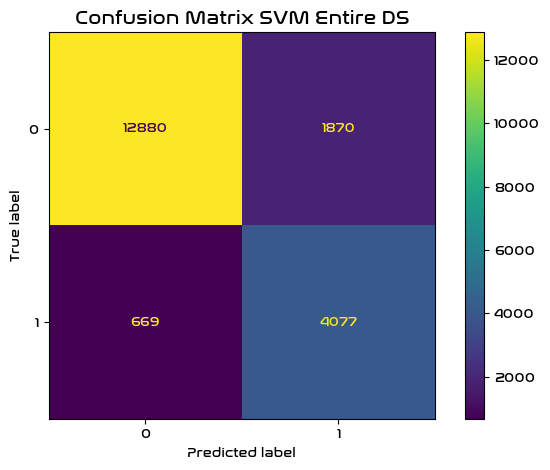

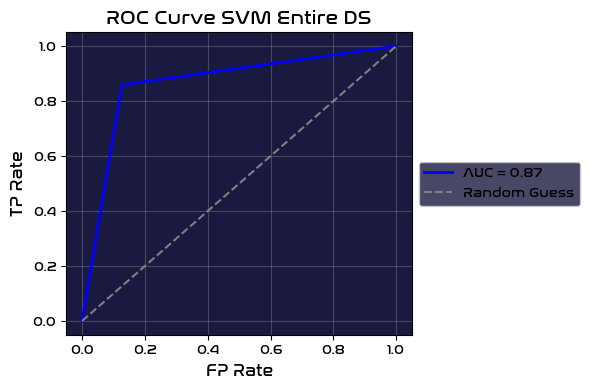

In [107]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix SVM Entire DS')
plot_roc_auc(y_test, y_pred, title='ROC Curve SVM Entire DS')

- **Reduced Dataset**

In [42]:
# REDUCED DATASET (100% of the train set)
# Best Hyperparameters: {'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

# Define the best SVM model
best_svm_model_r = SVC(C=100, degree=4, gamma='scale', kernel='poly', random_state=42)

# Fit the model with the reduced dataset
best_svm_model_r.fit(X_sm_r, y_sm_r)

SVC(C=100, degree=4, kernel='poly', random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     14750
           1       0.57      0.09      0.16      4746

    accuracy                           0.76     19496
   macro avg       0.67      0.54      0.51     19496
weighted avg       0.72      0.76      0.69     19496



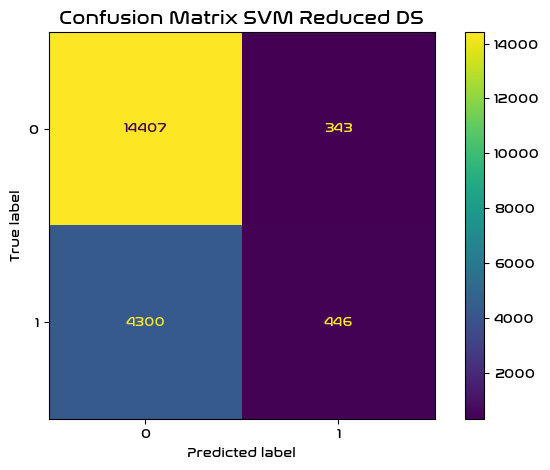

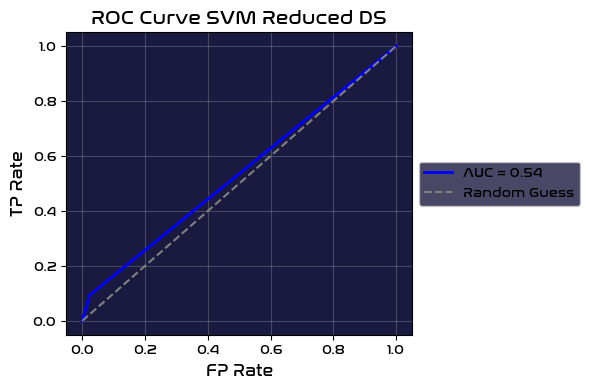

In [43]:
# Make predictions on the validation set
y_pred_r = best_svm_model_r.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_r))
plot_confusion_matrix(y_test, y_pred_r, title='Confusion Matrix SVM Reduced DS')
plot_roc_auc(y_test, y_pred_r, title='ROC Curve SVM Reduced DS')